<h3> Import data files </h3>

In [1]:
import pandas as pd

#load log file with no header
#df stands for data frame

df = pd.read_csv('abstractmathdatafile.csv', header=None)


#load csv file with correct responses to each math problem as well as column of problem types
#cor stands for correct

cor = pd.read_csv('correctresponses.csv', header = None)

<h3> Take a quick look at the dataframes </h3>

In [2]:
#print all the columns and rows of each dataframe
print(df)
print(cor)


     0       1  2
0    1  Prac01  3
1    1  Prac02  3
2    1  Prac03  1
3    1  Prac04  2
4    1  Prac05  1
..  ..     ... ..
240  5  Post31  2
241  5  Post32  1
242  5  Post33  2
243  5  Post34  1
244  5  Post35  2

[245 rows x 3 columns]
         0  1     2
0   Prac01  3  Prac
1   Prac02  3  Prac
2   Prac03  1  Prac
3   Prac04  2  Prac
4   Prac05  1  Prac
5   Prac06  2  Prac
6   Inst01  2  Inst
7   Inst02  3  Inst
8   Inst03  3  Inst
9   Inst04  2  Inst
10  Inst05  3  Inst
11  Inst06  1  Inst
12  Inst07  1  Inst
13  Inst08  2  Inst
14  Post01  1  Post
15  Post02  3  Post
16  Post03  1  Post
17  Post04  2  Post
18  Post05  3  Post
19  Post06  1  Post
20  Post07  3  Post
21  Post08  3  Post
22  Post09  3  Post
23  Post10  3  Post
24  Post11  2  Post
25  Post12  2  Post
26  Post13  3  Post
27  Post14  3  Post
28  Post15  3  Post
29  Post16  2  Post
30  Post17  3  Post
31  Post18  1  Post
32  Post19  1  Post
33  Post20  3  Post
34  Post21  3  Post
35  Post22  2  Post
36  Post23  2  Post


In [3]:
#show info of the dataframes
print(df.info())
print(cor.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       245 non-null    int64 
 1   1       245 non-null    object
 2   2       245 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       49 non-null     object
 1   1       49 non-null     int64 
 2   2       49 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None


In [4]:
#print the first few rows
print(df.head())
print(cor.head())

   0       1  2
0  1  Prac01  3
1  1  Prac02  3
2  1  Prac03  1
3  1  Prac04  2
4  1  Prac05  1
        0  1     2
0  Prac01  3  Prac
1  Prac02  3  Prac
2  Prac03  1  Prac
3  Prac04  2  Prac
4  Prac05  1  Prac


<h3> Add column names to both dataframes </h3>

In [5]:
#adding column names for subject ID, for math problem, and for participant response in the dataframe
df.columns = ['SubjectID', 'Problem', 'Response']
print(df.columns)

#adding column names for math problem and correct response for each problem in the correct responses dataframe
cor.columns = ['Problem', 'CorrectResponse', "ProblemType"]
print(cor.columns)


Index(['SubjectID', 'Problem', 'Response'], dtype='object')
Index(['Problem', 'CorrectResponse', 'ProblemType'], dtype='object')


In [6]:
#check that the headers are correct
print(df.head())
print(cor.head())


   SubjectID Problem  Response
0          1  Prac01         3
1          1  Prac02         3
2          1  Prac03         1
3          1  Prac04         2
4          1  Prac05         1
  Problem  CorrectResponse ProblemType
0  Prac01                3        Prac
1  Prac02                3        Prac
2  Prac03                1        Prac
3  Prac04                2        Prac
4  Prac05                1        Prac


<h3> Merging the two data frames into one frame </h3>


In [7]:
#mp stands for math performance

#pd.merge merges the two dataframes
#specifying "on problem" so that they merge using that common column, and "how left" to keep every column in the left dataframe
mp = pd.merge(df, cor, on = 'Problem', how = 'left')

#check that this did what we wanted it to do
print(mp.head())

   SubjectID Problem  Response  CorrectResponse ProblemType
0          1  Prac01         3                3        Prac
1          1  Prac02         3                3        Prac
2          1  Prac03         1                1        Prac
3          1  Prac04         2                2        Prac
4          1  Prac05         1                1        Prac


<h3> Create a column for accuracy </h3>

In [8]:
import numpy as np


#compare response column to correct response 
comparison = np.where(mp["Response"] == mp["CorrectResponse"], 1, 0)
print(comparison)

#create new column for accuracy data
mp["Accuracy"] = comparison
print(mp)

[1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1]
     SubjectID Problem  Response  CorrectResponse ProblemType  Accuracy
0            1  Prac01         3                3        Prac         1
1            1  Prac02         3                3        Prac         1
2            1  Prac03         1                1        Prac         1
3            1  Prac04         2                2        Prac         1
4            1  Prac05         1                1        Prac         1
..         ...     ...       ...              ...         ...       ..

<h3> Calculate Mean by Subject, by Problem Type, and by both Subject and Problem Type </h3>

In [9]:
#calculate mean accuracy on all problems (proportion correct of all responses) for each subject 
#sm stands for subject mean
sm = mp.groupby('SubjectID')['Accuracy'].mean()
print(sm)

#creating new dataframe to reorganize columns for data visualization
#propcorrect stands for proportion correct
sm2 = sm.groupby('SubjectID').mean().reset_index(name='PropCorrect')
print(sm2)

SubjectID
1    0.714286
2    0.836735
3    0.755102
4    0.836735
5    0.591837
Name: Accuracy, dtype: float64
   SubjectID  PropCorrect
0          1     0.714286
1          2     0.836735
2          3     0.755102
3          4     0.836735
4          5     0.591837


In [10]:
#calculate mean accuracy (proportion correct) by problem type
#ptm stands for problem type mean
ptm = mp.groupby('ProblemType')['Accuracy'].mean()
print(ptm)

#creating new dataframe to reorganize columns for data visualization
#propcorrect stands for proportion correct
ptm2 = ptm.groupby('ProblemType').mean().reset_index(name='PropCorrect')
print(ptm2)

ProblemType
Inst    0.725000
Post    0.742857
Prac    0.800000
Name: Accuracy, dtype: float64
  ProblemType  PropCorrect
0        Inst     0.725000
1        Post     0.742857
2        Prac     0.800000


In [11]:
#calculate mean accuracy (proportion correct) by problem type for each subject
#sptm stands for subject problem type mean
sptm = mp.groupby(['SubjectID', 'ProblemType'])['Accuracy'].mean()
print(sptm)

#creating new dataframe to reorganize columns for data visualization
#propcorrect stands for proportion correct
sptm2 = sptm.groupby(["SubjectID", "ProblemType"]).mean().reset_index(name='PropCorrect')
print(sptm2)

SubjectID  ProblemType
1          Inst           0.750000
           Post           0.685714
           Prac           0.833333
2          Inst           0.625000
           Post           0.914286
           Prac           0.666667
3          Inst           0.625000
           Post           0.800000
           Prac           0.666667
4          Inst           1.000000
           Post           0.771429
           Prac           1.000000
5          Inst           0.625000
           Post           0.542857
           Prac           0.833333
Name: Accuracy, dtype: float64
    SubjectID ProblemType  PropCorrect
0           1        Inst     0.750000
1           1        Post     0.685714
2           1        Prac     0.833333
3           2        Inst     0.625000
4           2        Post     0.914286
5           2        Prac     0.666667
6           3        Inst     0.625000
7           3        Post     0.800000
8           3        Prac     0.666667
9           4        Inst     1

<h3> Data Visualization </h3>

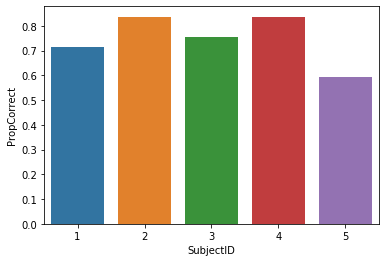

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#barplot with Subject on the X and Proportion Score (on all problems) on the Y; this is subject level data
sns.barplot(x='SubjectID', y="PropCorrect", data=sm2)
plt.show()


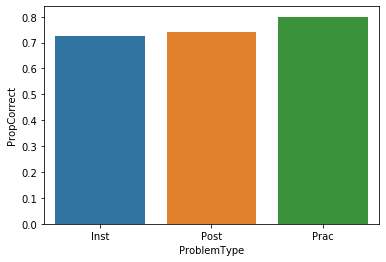

In [14]:
#barplot with Problem Type on the X and Proportion Score on the Y; this is group level data
sns.barplot(x='ProblemType', y="PropCorrect", data=ptm2)
plt.show()

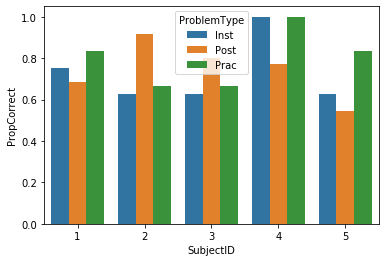

In [15]:
#barplot with Subject on the X, Proportion on the Y, and legend for Problem Type
sns.barplot(x='SubjectID', y="PropCorrect", hue = "ProblemType", data=sptm2)
plt.show()

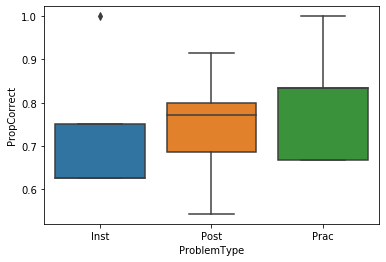

In [16]:
#boxplot with Problem Type on the X and Proportion Score on the Y
sns.boxplot(x='ProblemType', y='PropCorrect', data=sptm2)
plt.show()

<h3> Data Analysis </h3>

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#linear mixed effects model where accuracy on each problem is predicted by problem type
#with a random intercept for subject, which accounts for random error due to subject differences

md = smf.mixedlm("Accuracy ~ ProblemType", mp, groups=mp["SubjectID"])
mdf = md.fit()
print(mdf.summary())


           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  Accuracy 
No. Observations:    245      Method:              REML     
No. Groups:          5        Scale:               0.1856   
Min. group size:     49       Log-Likelihood:      -147.7503
Max. group size:     49       Converged:           Yes      
Mean group size:     49.0                                   
------------------------------------------------------------
                    Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept           0.725    0.077 9.400 0.000  0.574  0.876
ProblemType[T.Post] 0.018    0.076 0.236 0.813 -0.130  0.166
ProblemType[T.Prac] 0.075    0.104 0.721 0.471 -0.129  0.279
Group Var           0.007    0.017                          



/Users/maryaldugom/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
